# Modul 5: Integrasi Numerik

Kembali ke [Metode Numerik](./metnum2023genap.qmd)

1. Pengantar integrasi numerik dan metode Newton-Cotes (penjelasan tanpa kode)
2. Metode *closed Newton-Cotes*
3. Metode *open Newton-Cotes*
4. Tabel Ringkasan Metode *Newton-Cotes*
5. Integrasi numerik komposit: rumus umum
6. Integrasi numerik komposit: rumus khusus
7. Kuadratur adaptif (*Adaptive Quadrature*)
8. Kuadratur Gauss (*Gaussian Quadrature*), pada interval $[-1,1]$
9. Kuadratur Gauss untuk sembarang interval (*Gaussian Quadrature on Arbitrary Intervals*)

# 1. Pengantar integrasi numerik dan metode Newton-Cotes (penjelasan tanpa kode)

Di kalkulus, kita sudah mempelajari integral Riemann, yang melibatkan penjumlahan luas sejumlah persegi panjang, yang secara keseluruhan mengaproksimasi luas di bawah kurva (yang berupa fungsi). Makin banyak persegi panjang, maka hasil perhitungan menjadi semakin akurat. Sebenarnya, itu sudah termasuk integrasi numerik (sayangnya, secara pemrograman, kita tidak bisa membuat limit menuju tak hingga).

Integrasi numerik juga disebut "kuadratur numerik" atau "kuadratur" saja.

Di mata kuliah metode numerik, salah satu teknik integrasi numerik (untuk menghitung integral tentu) yang kita pelajari disebut metode Newton-Cotes, yang **secara teori** melibatkan aproksimasi fungsi dengan polinom interpolasi Lagrange, kemudian dihitung integral analitik dari polinom interpolasi Lagrange tersebut. Semua titik-titik yang digunakan untuk interpolasi (disebut *nodes*) ada di dalam interval integral tentu, dan jarak antar titik-titik tersebut menggunakan *step size* yang konstan, yang bisa kita sebut $h$ (seperti biasa).

Untungnya, setelah dilakukan penyederhanaan dan manipulasi aljabar, bentuk rumus yang dihasilkan oleh metode Newton-Cotes menjadi cukup singkat dan sederhana. Sehingga, pada prakteknya, ketika menggunakan metode Newton-Cotes, kita tinggal menggunakan rumus hasil akhirnya; kita tidak perlu lagi pusing dengan interpolasi Lagrange.

Integral tentu pasti memliki batas bawah $a$ dan batas atas $b$ (bisa dianggap sebagai batasan interval di mana integrasi akan dilakukan), dan bisa ditulis $\int_{a}^{b} f\left(x\right) dx$. Untuk interpolasi yang dilakukan dalam metode Newton-Cotes, secara keseluruhan ada dua cara untuk memilih *nodes* yang akan diberlakukan interpolasi, yaitu dengan melibatkan ujung interval integrasi (dianggap interval tutup $[a,b]$ atau *closed interval*) maupun tidak melibatkan ujung interval (dianggap interval buka $(a,b)$ atau *open interval*). Dengan demikian, rumus metode Newton Cotes bisa dikategorikan menjadi dua jenis, yaitu ***closed Newton-Cotes*** dan ***open Newton-Cotes***, tergantung teknis interpolasi apakah melibatkan titik ujung interval atau tidak. Tentu saja, rumusnya menjadi berbeda.

Baik untuk *closed Newton-Cotes* maupun *open Newton-Cotes*, banyaknya *nodes* yang berbeda juga menghasilkan rumus yang berbeda. Karena *closed Newton-Cotes* melibatkan titik ujung interval, maka diperlukan minimal dua *nodes* (yaitu kedua titik ujung interval). Sedangkan, untuk *open Newton-Cotes*, minimal banyaknya *nodes* cukup satu saja.

# 2. Metode *closed Newton-Cotes*

Dalam penulisan berbagai variasi rumus *closed Newton-Cotes*, digunakan variabel $n$ apabila telah digunakan $(n+1)$ *nodes* untuk interpolasi, dan titik-titik tersebut biasanya ditulis $x_0, x_1, x_2, \dots, x_n$, yaitu $x_i$ untuk $i=0,1,2,\dots,n$.

Nilai $n$ terkecil yang mungkin adalah $n=1$ (di mana digunakan $n+1=2$ *nodes* untuk interpolasi), dan sering disebut "trapezoidal rule", karena luas yang sebenarnya dihitung memang kebetulan berbentuk trapezoid. (Pada gambar berikut ini, $f(x)$ adalah fungsi yang ingin diintegralkan, sedangkan $P_1 (x)$ adalah polinom interpolasi Lagrange yang mengaproksimasi $f(x)$ pada *nodes* yang telah ditentukan.)

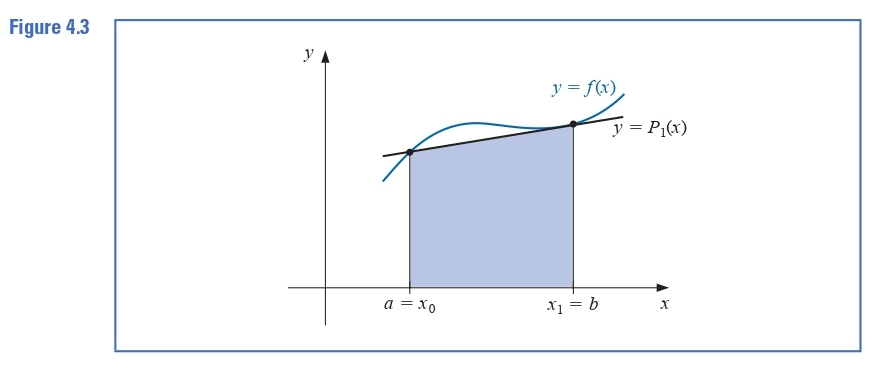

Sumber gambar: Burden, Richard L., Faires, J. Douglas. *Numerical Analysis*. Edisi ke-9. Bab 4, "Numerical Differentiation and Integration". Subbab 4.3, "Elements of Numerical Integration". Hlm. 194

Sedangkan, rumus *closed Newton-Cotes* untuk $n=2$ (menggunakan $n+1=3$ *nodes* untuk interpolasi) disebut "Simpson's rule".

Perhatikan bahwa, **secara umum, $(n+1)$ titik yang digunakan seolah-olah membagi interval $[a,b]$ menjadi $n$ subinterval.** Misalnya, pada gambar berikut, metode Simpson dengan $n=2$ (menggunakan tiga titik: $x_0, x_1, x_2$) terlihat seperti membagi interval $[a,b]$ menjadi $n=2$ subinterval, yaitu $[x_0, x_1]$ dan $[x_1, x_2]$.

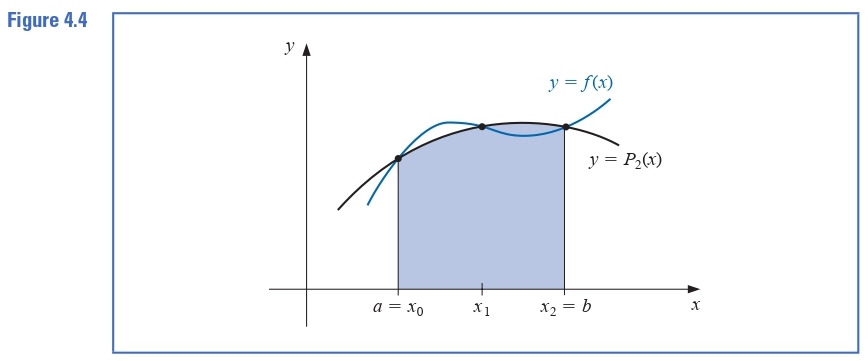

Sumber gambar: Burden, Richard L., Faires, J. Douglas. *Numerical Analysis*. Edisi ke-9. Bab 4, "Numerical Differentiation and Integration". Subbab 4.3, "Elements of Numerical Integration". Hlm. 195

Berikut penjabaran beberapa rumus *closed Newton-Cotes* untuk mengaproksimasi integral tentu pada interval tutup $[a,b]$, masing-masing menggunakan titik-titik $x_i = x_0 + ih$ untuk $i = 0, 1, \dots, n$, serta *step size* $h = \frac{b-a}{n}$. Di sini, dibuat $x_0 = a$ dan $x_n = b$.

$n=1$ (**trapezoidal rule**):

$$\int_a^b f \left( x \right) dx \approx \frac{h}{2} \left[ f(x_0) + f(x_1)\right]$$

dengan $h = b-a$.

$n=2$ (**Simpson's rule**):

$$\int_a^b f \left( x \right) dx \approx \frac{h}{3} \left[ f(x_0) + 4f(x_1) + f(x_2)\right]$$

dengan $h = \frac{b-a}{2}$.

$n=3$ (**Simpson's Three-Eights rule**):

$$\int_a^b f \left( x \right) dx \approx \frac{3h}{8} \left[ f(x_0) + 3f(x_1) + 3f(x_2) + f(x_3)\right]$$

dengan $h = \frac{b-a}{3}$.

$n=4$ (**Boole's rule**):

$$\int_a^b f \left( x \right) dx \approx \frac{2h}{45} \left[ 7f(x_0) + 32f(x_1) + 12f(x_2) + 32f(x_3) + 7f(x_4)\right]$$

dengan $h = \frac{b-a}{4}$.

Karena rumusnya sudah ada, pembuatan program untuk metode *closed Newton-Cotes* tergolong mudah.

In [ ]:
from numpy import sin, cos, tan, log, exp, pi

print("Metode closed Newton-Cotes untuk integral tentu")
print("Masukkan rumus fungsi yang akan diintegralkan:")
formula = input("f(x) = ")
def func(x):
    return eval(formula)

lower_bound = eval(input("Masukkan batas bawah integral: "))
upper_bound = eval(input("Masukkan batas atas integral: "))
print()

# n = 1 (Trapezoidal rule)
def TrapezoidalRule(f,a,b):
    # f adalah fungsi
    h = b-a
    x = [a, b] # list nilai x
    hasil = (h/2) * ( f(x[0]) + f(x[1]) )
    return hasil

# n = 2 (Simpson's rule)
def SimpsonsRule(f,a,b):
    h = (b-a)/2
    x = [a, a+h, b]
    hasil = (h/3) * ( f(x[0]) + 4*f(x[1]) + f(x[2]) )
    return hasil

# n = 3 (Simpson's Three-Eights rule)
def SimpsonsThreeEightsRule(f,a,b):
    h = (b-a)/3
    x = [a, a+h, a + 2*h, b]
    hasil = (3*h/8) * ( f(x[0]) + 3*f(x[1]) + 3*f(x[2]) + f(x[3]) )
    return hasil

# n = 4 (Boole's rule)
def BoolesRule(f,a,b):
    h = (b-a)/4
    x = [a, a+h, a + 2*h, a + 3*h, b]
    hasil = (2*h/45) * ( 7*f(x[0]) + 32*f(x[1]) + 12*f(x[2]) + 32*f(x[3]) + 7*f(x[4]) )
    return hasil

# Menghitung aproksimasi integral func(x) untuk n=1,2,3,4
hasil_closed_1 = TrapezoidalRule(func, lower_bound, upper_bound)
hasil_closed_2 = SimpsonsRule(func, lower_bound, upper_bound)
hasil_closed_3 = SimpsonsThreeEightsRule(func, lower_bound, upper_bound)
hasil_closed_4 = BoolesRule(func, lower_bound, upper_bound)

# Menampilkan hasil
print("Berikut hasil aproksimasi integral dengan closed Newton-Cotes:")
print(f"n=1: {hasil_closed_1} (Trapezoidal rule)")
print(f"n=2: {hasil_closed_2} (Simpson's rule)")
print(f"n=3: {hasil_closed_3} (Simpson's Three-Eights rule)")
print(f"n=4: {hasil_closed_4} (Boole's rule)")

Metode closed Newton-Cotes untuk integral tentu
Masukkan rumus fungsi yang akan diintegralkan:
f(x) = sin(x)
Masukkan batas bawah integral: 0
Masukkan batas atas integral: pi/4

Berikut hasil aproksimasi integral dengan closed Newton-Cotes:
n=1: 0.2776801836348979 (Trapezoidal rule)
n=2: 0.292932637839748 (Simpson's rule)
n=3: 0.29291070254917145 (Simpson's Three-Eights rule)
n=4: 0.29289318256126384 (Boole's rule)


# 3. Metode *open Newton-Cotes*

Dalam penulisan berbagai variasi rumus *open Newton-Cotes*, digunakan variabel $n$ apabila telah digunakan $(n+1)$ *nodes* untuk interpolasi.

Nilai $n$ terkecil yang mungkin adalah $n=0$ (di mana digunakan $n+1=1$ *nodes* untuk interpolasi), dan sering disebut "midpoint rule", karena satu titik yang digunakan tersebut kebetulan berada di tengah-tengah interval $(a,b)$, sehingga menjadi midpoint atau titik tengah dari interval integerasi.



Berikut penjabaran beberapa rumus *open Newton-Cotes* untuk mengaproksimasi integral tentu pada interval buka $(a,b)$, masing-masing menggunakan titik-titik $x_i = x_0 + ih$ untuk $i = 0, 1, \dots, n$, serta *step size* $h = \frac{b-a}{n+2}$. Di sini, dibuat $x_0 = a+h$ dan $x_n = b-h$.

$n=0$ (**midpoint rule**):

$$\int_{a}^{b} f\left(x\right) dx \approx 2hf(x_0)$$

dengan $h = \frac{b-a}{2}$.

$n=1$:

$$\int_{a}^{b} f\left(x\right) dx \approx \frac{3h}{2} \left[ f(x_0) + f(x_1) \right]$$

dengan $h = \frac{b-a}{3}$.

$n=2$:

$$\int_{a}^{b} f\left(x\right) dx \approx \frac{4h}{3} \left[ 2f(x_0) - f(x_1) + 2f(x_2) \right]$$

dengan $h = \frac{b-a}{4}$.

$n=3$:

$$\int_{a}^{b} f\left(x\right) dx \approx \frac{5h}{24} \left[ 11f(x_0) + f(x_1) + f(x_2) + 11f(x_3) \right]$$

dengan $h = \frac{b-a}{5}$.

Lagi-lagi, karena semua rumus sudah ada dan tinggal digunakan, pembuatan program untuk metode *open Newton-Cotes* tergolong mudah.

In [ ]:
from numpy import sin, cos, tan, log, exp, pi

print("Metode open Newton-Cotes untuk integral tentu")
print("Masukkan rumus fungsi yang akan diintegralkan:")
formula = input("f(x) = ")
def func(x):
    return eval(formula)

lower_bound = eval(input("Masukkan batas bawah integral: "))
upper_bound = eval(input("Masukkan batas atas integral: "))
print()

# n = 0 (Midpoint rule)
def OpenNC_n0(f,a,b):
    # f adalah fungsi
    h = (b-a)/2
    x = [a+h] # list nilai x
    hasil = 2*h*f(x[0])
    return hasil

# n = 1
def OpenNC_n1(f,a,b):
    h = (b-a)/3
    x = [a+h, a + 2*h] # list nilai x
    hasil = (3*h/2) * ( f(x[0]) + f(x[1]) )
    return hasil

# n = 2
def OpenNC_n2(f,a,b):
    h = (b-a)/4
    x = [a+h, a + 2*h, a + 3*h]
    hasil = (4*h/3) * ( 2*f(x[0]) - f(x[1]) + 2*f(x[2]) )
    return hasil

# n = 3
def OpenNC_n3(f,a,b):
    h = (b-a)/5
    x = [a+h, a + 2*h, a + 3*h, a + 4*h]
    hasil = (5*h/24) * ( 11*f(x[0]) + f(x[1]) + f(x[2]) + 11*f(x[3]) )
    return hasil

# Menghitung aproksimasi integral func(x) untuk n=1,2,3,4
hasil_open_0 = OpenNC_n0(func, lower_bound, upper_bound)
hasil_open_1 = OpenNC_n1(func, lower_bound, upper_bound)
hasil_open_2 = OpenNC_n2(func, lower_bound, upper_bound)
hasil_open_3 = OpenNC_n3(func, lower_bound, upper_bound)

# Menampilkan hasil
print("Berikut hasil aproksimasi integral dengan open Newton-Cotes:")
print(f"n=0: {hasil_open_0} (Midpoint rule)")
print(f"n=1: {hasil_open_1}")
print(f"n=2: {hasil_open_2}")
print(f"n=3: {hasil_open_3}")

Metode open Newton-Cotes untuk integral tentu
Masukkan rumus fungsi yang akan diintegralkan:
f(x) = sin(x)
Masukkan batas bawah integral: 0
Masukkan batas atas integral: pi/4

Berikut hasil aproksimasi integral dengan open Newton-Cotes:
n=0: 0.30055886494217315 (Midpoint rule)
n=1: 0.29798754218726264
n=2: 0.2928586591925902
n=3: 0.29286922813608435


# 4. Tabel Ringkasan Metode *Newton-Cotes*

Untuk n=0,1,2,3,4, kita bisa meringkas hasil untuk semua metode Newton-Cotes (baik *closed* maupun *open*) di dalam satu tabel, di mana
- baris pertama adalah nilai n,
- baris kedua adalah hasil *closed* Newton-Cotes yang sesuai untuk tiap nilai n, dan
- baris ketiga adalah hasil *open* Newton-Cotes yang sesuai.

Untuk nilai n yang tidak mungkin, seperti n=0 untuk *closed* Newton-Cotes, itu bisa dikosongkan saja.

Seperti biasa, kita bisa menggunakan tabulate. Kali ini, karena tabel cukup sederhana, kita bisa langsung menyusun tabel dalam bentuk list-di-dalam-list secara manual, yang kemudian akan diolah oleh tabulate.

In [ ]:
from numpy import sin, cos, tan, log, exp, pi
from tabulate import tabulate

print("Tabel metode closed (n=1,2,3,4) dan open (n=0,1,2,3) Newton-Cotes")
print("Masukkan rumus fungsi yang akan diintegralkan:")
formula = input("f(x) = ")
def func(x):
    return eval(formula)

lower_bound = eval(input("Masukkan batas bawah integral: "))
upper_bound = eval(input("Masukkan batas atas integral: "))
print()

# Menghitung metode closed Newton-Cotes untuk n=0,1,2,3
hasil_closed_1 = TrapezoidalRule(func, lower_bound, upper_bound)
hasil_closed_2 = SimpsonsRule(func, lower_bound, upper_bound)
hasil_closed_3 = SimpsonsThreeEightsRule(func, lower_bound, upper_bound)
hasil_closed_4 = BoolesRule(func, lower_bound, upper_bound)

# Menghitung metode open Newton-Cotes untuk n=1,2,3,4
hasil_open_0 = OpenNC_n0(func, lower_bound, upper_bound)
hasil_open_1 = OpenNC_n1(func, lower_bound, upper_bound)
hasil_open_2 = OpenNC_n2(func, lower_bound, upper_bound)
hasil_open_3 = OpenNC_n3(func, lower_bound, upper_bound)

# Menyusun tabel secara manual
tabel_mentah = [
    ["n", "0", "1", "2", "3", "4"],
    ["closed", "", hasil_closed_1, hasil_closed_2, hasil_closed_3, hasil_closed_4],
    ["open", hasil_open_0, hasil_open_1, hasil_open_2, hasil_open_3, ""]
]

tabel_olahan = tabulate(tabel_mentah, tablefmt="pretty", floatfmt=".10f",
                        headers="firstrow")

print("Hasil tabel metode Newton-Cotes:")
print(tabel_olahan)

Tabel metode closed (n=1,2,3,4) dan open (n=0,1,2,3) Newton-Cotes
Masukkan rumus fungsi yang akan diintegralkan:
f(x) = sin(x)
Masukkan batas bawah integral: 0
Masukkan batas atas integral: pi/4

Hasil tabel metode Newton-Cotes:
+--------+---------------------+---------------------+--------------------+---------------------+---------------------+
|   n    |          0          |          1          |         2          |          3          |          4          |
+--------+---------------------+---------------------+--------------------+---------------------+---------------------+
| closed |                     | 0.2776801836348979  | 0.292932637839748  | 0.29291070254917145 | 0.29289318256126384 |
|  open  | 0.30055886494217315 | 0.29798754218726264 | 0.2928586591925902 | 0.29286922813608435 |                     |
+--------+---------------------+---------------------+--------------------+---------------------+---------------------+


# 5. Integrasi numerik komposit: rumus umum

Untuk interval yang tidak besar, metode Newton-Cotes cukup akurat. Ingat bahwa metode Newton-Cotes bersandar pada polinom interpolasi Lagrange, yang sering naik-turun atau berosilasi, sehingga berisiko terlalu jauh berbeda dari fungsi yang aslinya, apalagi sekitar titik pertama dan titik terakhir yang digunakan untuk interpolasi. (*Fun fact*: masalah osilasi ini disebut fenomena Runge.) Risiko tersebut membuat **metode Newton-Cotes kurang cocok untuk interval yang besar**, karena hasil aproksimasi luasnya menjadi kurang akurat.

Namun, **kita bisa saja memecah suatu integral tentu menjadi sejumlah integral yang masing-masing memiliki interval yang lebih kecil** (yang merupakan subinterval dari interval integrasi aslinya), **kemudian menerapkan metode Newton-Cotes untuk masing-masing integral.** Teknik ini disebut **integrasi numerik komposit.**

Tentu saja, untuk suatu integral tentu $\int_{A}^{B} f\left(x\right) dx$, kita bisa bebas memilih bagaimana cara memecah interval integrasi yang asli, $[A,B]$, menjadi beberapa subinterval. Namun, **untuk mempermudah pemrograman, kita bisa memecah $[A,B]$ menjadi sejumlah $N$ subinterval (akan kita sebut $N$ "subinterval besar") yang sama panjang**, masing-masing memiliki panjang $\frac{B-A}{N}$. Kemudian, metode Newton-Cotes yang dipilih bisa diterapkan untuk masing-masing subinterval besar $[a_i,b_i] \subseteq [A,B]$, dengan $i=1,2,3,\dots,N$. Sehingga, berlaku $a_1=A$ dan $b_N=B$, serta berlaku $a_2=b_1$, $a_3=b_2$ dan seterusnya, atau bisa dituliskan $a_i=b_{i-1}$ untuk $i=2,3,4,\dots,N$.

$$\int_{A}^{B} f\left(x\right) dx = \int_{a_1}^{b_1} f\left(x\right) dx + \int_{a_2}^{b_2} f\left(x\right) dx + \cdots + \int_{a_N}^{b_N} f\left(x\right) dx$$

Teknis perhitungan metode Newton-Cotes bisa melibatkan penggunaan beberapa titik pada $[a_i,b_i]$. Sehingga, **subinterval besar $[a_i, b_i]$, secara tidak langsung, dipecah menjadi beberapa subinterval kecil.**

Misalnya, ketika menerapkan metode Simpson pada $[a_1,b_1]$, digunakan $h=\frac{b_1-a_1}{2}$, yang memecah subinterval besar $[a_1,b_1]$ menjadi dua subinterval kecil yaitu $\left[a_1,a_1+h\right]$ dan $\left[a_1+h,b_1\right]$. Sehingga, untuk metode Simpson komposit, banyaknya subinterval kecil $n=2N$. Perhatikan gambar berikut dengan $N=4$, $n=8$.

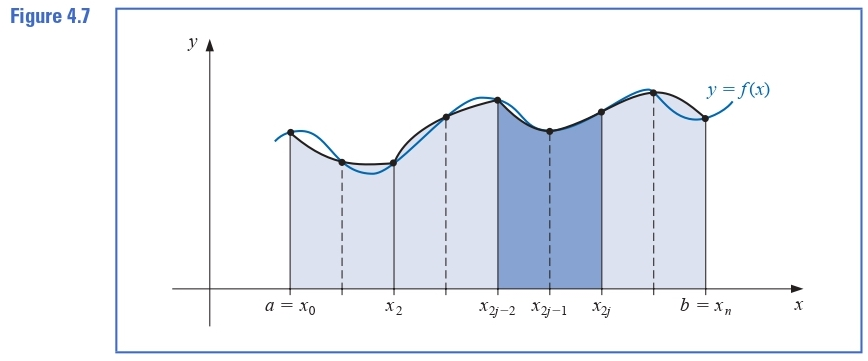

Sumber gambar: Burden, Richard L., Faires, J. Douglas. *Numerical Analysis*. Edisi ke-9. Bab 4, "Numerical Differentiation and Integration". Subbab 4.4, "Composite Numerical Integration". Hlm. 204

Pada gambar di atas, digunakan metode Simpson komposit untuk $N=4$ subinterval besar. Masing-masing subinterval besar (misalnya subinterval besar ke-$i$ untuk $i=1,2,\dots,N$) menggunakan titik-titik $x_{i-1}$, $x_i$, dan $x_{i+1}$. 

Terlihat bahwa masing-masing subinterval besar (misalnya subinterval besar ke-3, yang diwarnai biru gelap) terbagi lagi menjadi dua subinterval kecil, sehingga banyaknya subinterval kecil $n=2N=8$. Secara keseluruhan, digunakan sebanyak $(n+1)$ titik, yaitu $x_0, x_1, x_2, \dots, x_n$. Untuk gambar di atas, digunakan $n+1=9$ titik yaitu $x_0, x_1, x_2, \dots, x_8$.

Dengan demikian, **ada dua cara untuk membuat program integrasi numerik komposit**, yaitu
1. **hanya melihat tiap subinterval besar sampai $N$**, kemudian memanggil fungsi metode Newton-Cotes yang sesuai untuk tiap subinterval besar; atau
2. **melihat semua subinterval kecil sampai $n$** (sehingga nantinya menggunakan rumus khusus)

Cara yang pertama menghasilkan program yang cukup fleksibel, bisa menerima sembarang metode Newton-Cotes (atau bahkan sembarang metode integrasi numerik) dan kodenya tetap sama. Cara yang kedua melibatkan rumus khusus (seperti yang diberikan di buku), baik untuk metode Simpson komposit, metode trapezoidal komposit, maupun metode midpoint komposit, ataupun yang lainnya.

Berikut ini, kita akan membuat program dengan cara pertama.

In [ ]:
def KompositUmum(FungsiNC, fungsi_x, A, B, N):
    # awalnya belum ada luas yang dihitung, masih nol
    hasil_akhir = 0

    # panjang tiap subinterval besar
    H = (B-A)/N

    # titik ujung atau batasan dari subinterval besar pertama [a_1, b_1]:
    a_i = A
    b_i = A+H
    # nama variabel a_i, b_i karena akan diubah-ubah

    # lakukan metode Newton-Cotes yang diberikan untuk tiap subinterval besar
    for i in range(N):
        hasil_subinterval = FungsiNC(fungsi_x, a_i, b_i)
        hasil_akhir += hasil_subinterval

        # lanjut ke subinterval besar berikutnya
        a_i = b_i # karena a_i = b_{i-1}
        b_i += H
    
    return hasil_akhir

Perhatikan bahwa fungsi tersebut seperti "membungkus" apapun fungsi metode Newton-Cotes yang diberikan. Istilahnya, fungsi tersebut merupakan "wrapper function".

Kemudian, kita bisa menerapkan *wrapper function* tersebut ke sembarang fungsi metode Newton-Cotes. Sebagai contoh, berikut metode Simpson komposit:

In [ ]:
from numpy import sin, cos, tan, log, exp, pi

print("Integrasi Numerik Komposit Simpson dengan rumus umum")
print("Masukkan rumus fungsi yang akan diintegralkan:")
formula = input("f(x) = ")
def func(x):
    return eval(formula)

lower_bound = eval(input("Masukkan batas bawah: "))
upper_bound = eval(input("Masukkan batas atas: "))
partisi_besar = eval(input("Masukkan jumlah subinterval besar (N): "))
print()

# bisa diganti dengan fungsi closed/open Newton-Cotes yang manapun
FungsiNC = SimpsonsRule
# (harus sudah terdefinisi dulu)

hasil = KompositUmum(FungsiNC, func, lower_bound, upper_bound, partisi_besar)
print("Hasil integrasi numerik:")
print(hasil)

Integrasi Numerik Komposit Simpson dengan rumus umum
Masukkan rumus fungsi yang akan diintegralkan:
f(x) = x * log(x)
Masukkan batas bawah: 1
Masukkan batas atas: 2
Masukkan jumlah subinterval besar (N): 2

Hasil integrasi numerik:
0.6363098297969493


# 6. Integrasi numerik komposit: rumus khusus

Untuk cara kedua, di buku Burden, sudah dilakukan penjabaran sehingga diperoleh rumus khusus untuk beberapa metode Newton-Cotes komposit, yaitu:
* Metode Simpson Komposit (*composite Simpson's rule*)
* Metode Trapezoidal Komposit (*composite trapezoidal rule*)
* Metode Midpoint Komposit (*composite midpoint rule*)

Masing-masing rumus khusus langsung melihat semua $n$ subinterval kecil yang terbentuk oleh $(n+1)$ titik yang digunakan. Namun, dibandingkan dengan cara yang sebelumnya (rumus umum), hasil akhirnya akan sama persis. Berikut rumus khususnya, untuk integral tentu $\int_{a}^{b} f\left(x\right) dx$ yang kemudian dibagi menjadi $n$ subinterval kecil, di mana tiap subinterval kecil memiliki panjang $h$ sesuai ketentuan metodenya.

1. Metode Simpson Komposit

$$\int_{a}^{b} f\left(x\right) dx \approx \frac{h}{3} \left[ f(a) + 2\sum_{j=1}^{(n/2)-1} f(x_{2j}) + 4\sum_{j=1}^{n/2} f(x_{2j-1}) + f(b) \right]$$

di mana $n$ harus genap, $h = (b-a)/n$, dan $x_j = a + jh$ untuk $j = 0, 1, \dots, n$.

2. Metode Trapezoidal Komposit

$$\int_{a}^{b} f\left(x\right) dx \approx \frac{h}{2} \left[ f(a) + 2\sum_{j=1}^{n-1} f(x_j) + f(b) \right]$$

di mana $n$ adalah bilangan bulat positif, $h = (b-a)/n$, dan $x_j = a + jh$ untuk $j = 0, 1, \dots, n$.

3. Metode Midpoint Komposit

$$\int_{a}^{b} f\left(x\right) dx \approx 2h \sum_{j=0}^{n/2} f\left(x_{2j}\right)$$

di mana $n$ harus genap, $h = (b-a)/(n+2)$, dan $x_j = a + jh$ untuk $j=0,1,\dots,n$.

Adanya syarat $n$ genap untuk metode Simpson komposit dan metode midpoint komposit disebabkan hubungan antara $n$ dan $N$ yang melibatkan perkalian 2 untuk kedua metode komposit tersebut (serta sumasi dilakukan hingga $n/2$). Sedangkan, untuk metode trapezoidal komposit, berlaku $n = N$; yaitu, istilah "subinterval kecil" dan "subinterval besar" ternyata sama saja (khusus trapezoidal).

Sebelumnya, sudah ditampilkan gambar proses partisi untuk metode Simpson komposit, di mana terlihat perbedaan antara subinterval kecil (ada sebanyak $n$) dan subinterval besar (ada sebanyak $N$), serta terlihat $n=2N$.

Berikut gambar untuk metode trapezoidal komposit, di mana $n=N$, atau tidak ada perbedaan antara subinterval kecil dan subinterval besar:

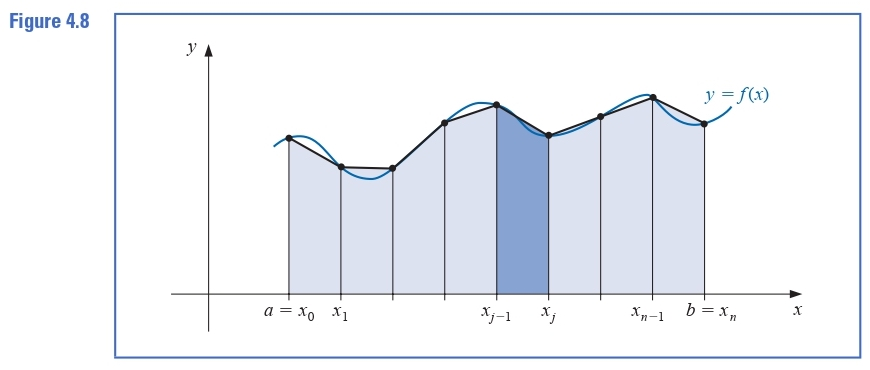

Sumber gambar: Burden, Richard L., Faires, J. Douglas. *Numerical Analysis*. Edisi ke-9. Bab 4, "Numerical Differentiation and Integration". Subbab 4.4, "Composite Numerical Integration". Hlm. 207

Sedangkan, berikut di bawah ini adalah gambar untuk metode midpoint komposit, dengan $n=10$ dan $N=6$, di mana banyaknya subinterval kecil terhitung dari titik $x_0$ sampai $x_n$, sedangkan banyaknya subinterval besar terhitung dari $a=x_{-1}$ sampai $b=x_{n+1}$. Kali ini, berlaku $n=2N-2$.

Perhatikan bahwa metode midpoint termasuk *open Newton-Cotes*, tidak seperti metode trapezoidal dan metode Simpson yang termasuk *closed Newton-Cotes*. Sehingga, untuk metode midpoint komposit, titik-titik pada ujung interval, yaitu titik $a=x_{-1}$ dan $b=x_{n+1}$, itu sama sekali tidak terlibat dalam perhitungan; berkurangnya dua titik itu menyebabkan yang tadinya $n=2N$ (gambarnya sama dengan Simpson komposit) itu menjadi $n=2N-2$.

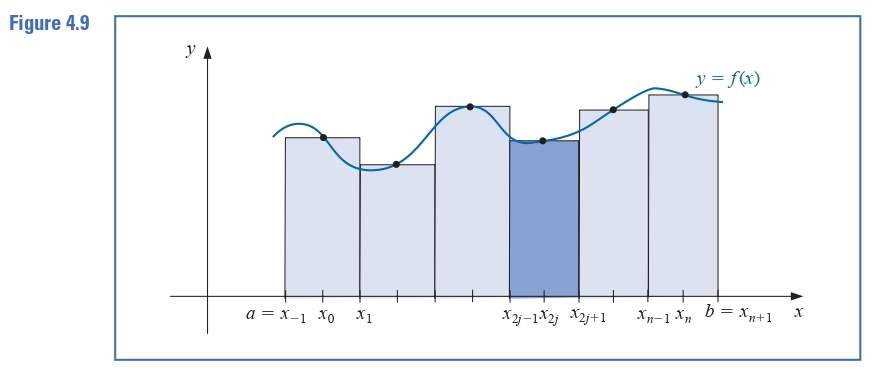

Sumber gambar: Burden, Richard L., Faires, J. Douglas. *Numerical Analysis*. Edisi ke-9. Bab 4, "Numerical Differentiation and Integration". Subbab 4.4, "Composite Numerical Integration". Hlm. 207

Proses pemrograman untuk rumus-rumus tersebut melibatkan proses iterasi untuk menghitung sumasi/penjumlahan yang ada pada rumusnya.

In [ ]:
from numpy import sin, cos, tan, log, exp, pi

print("Integrasi Numerik Komposit dengan rumus khusus")
print("Masukkan rumus fungsi yang akan diintegralkan:")
formula = input("f(x) = ")
def func(x):
    return eval(formula)

lower_bound = eval(input("Masukkan batas bawah: "))
upper_bound = eval(input("Masukkan batas atas: "))
partisi = eval(input("Masukkan jumlah partisi / subinterval kecil (n): "))
print()

def CompSimpson(f,a,b,n):
    if n%2 == 1: # jika n ganjil
        return "banyaknya subinterval kecil harus genap"
    elif n%2 == 0: # jika n genap (sudah benar)
        # panjang tiap subinterval kecil
        h = (b-a)/n
        
        # list semua titik x
        X = []
        # ada n subinterval kecil, maka ada (n+1) titik, x0 = a
        for i in range(n+1): # untuk i = 0, 1, 2, ..., n
            # titik dengan indeks i, dari x_0 = a, x_1, x_2, sampai x_n = b
            x_i = a + i*h

            # tambahkan ke list x
            X.append(x_i) 
        # sampai sini, list x sudah lengkap

        # menghitung kedua sumasi:
        sum1 = 0 # untuk sumasi f(x_{2j})
        sum2 = 0 # untuk sumasi f(x_{2j-1})
        for j in range (1, int(n/2)): # untuk j = 1, 2, ..., (n/2)-1
            sum1 += f(X[2*j])
            sum2 += f(X[2*j-1])
        
        # sumasi yang kedua ternyata sampai j=(n/2),
        # sehingga kita tambahkan sekali lagi
        j = int(n/2)
        sum2 += f(X[2*j-1])

        # gunakan rumus
        hasil = (h/3) * ( f(a) + 2*sum1 + 4*sum2 + f(b) )
        return hasil

def CompTrapezoidal(f,a,b,n):
    # panjang tiap subinterval kecil
    h = (b-a)/n

    # list semua titik x
    X = []
    # ada n subinterval kecil, maka ada (n+1) titik, x0 = a
    for i in range(n+1): # untuk i = 0, 1, 2, ..., n
        # titik dengan indeks i, dari x_0 = a, x_1, x_2, sampai x_n = b
        x_i = a + i*h

        # tambahkan ke list x
        X.append(x_i) 
    # sampai sini, list x sudah lengkap

    # menghitung sumasi
    sumasi = 0
    for j in range(1,n): # untuk j = 1, 2, ..., n-1
        sumasi += f(X[j])
    
    # gunakan rumus
    hasil = (h/2) * ( f(a) + 2*sumasi + f(b) )
    return hasil

def CompMidpoint(f,a,b,n):
    if n%2==1: # jika n ganjil
        return "banyaknya subinterval kecil harus genap"
    elif n%2==0: # jika n genap (sudah benar)
        # panjang tiap subinterval kecil
        h = (b-a)/(n+2)
        # (dibagi n+2 karena metode Midpoint termasuk OPEN Newton-Cotes)

        # list semua titik x
        X = []
        # ada n subinterval kecil, maka ada (n+1) titik, x0 = a + h
        # (x0 = a + h karena OPEN Newton-Cotes)
        for i in range(n+1): # untuk i = 0, 1, 2, ..., n
            # titik dengan indeks i, dari x_0 = (a+h), x_1, x_2, sampai x_n
            x_i = (a+h) + i*h
            # supaya, jika i=0, maka x_i = x_0 = a+h

            # tambahkan ke list x
            X.append(x_i) 
        # sampai sini, list x sudah lengkap

        # menghitung sumasi
        sumasi = 0
        for j in range (0, int(n/2)+1): # untuk j = 0, 1, 2, ..., n/2
            sumasi += f(X[2*j])
        
        # gunakan rumus
        hasil = 2 * h * sumasi
        return hasil

simpson_komposit = CompSimpson(func, lower_bound, upper_bound, partisi)
trapezoidal_komposit = CompTrapezoidal(func, lower_bound, upper_bound, partisi)
midpoint_komposit = CompMidpoint(func, lower_bound, upper_bound, partisi)

print("Hasil integrasi numerik komposit:")
print("{0} (Metode Simpson Komposit)".format(simpson_komposit))
print("{0} (Metode Trapezoidal Komposit)".format(trapezoidal_komposit))
print("{0} (Metode Midpoint Komposit)".format(midpoint_komposit))

Integrasi Numerik Komposit dengan rumus khusus
Masukkan rumus fungsi yang akan diintegralkan:
f(x) = x * log(x)
Masukkan batas bawah: 1
Masukkan batas atas: 2
Masukkan jumlah partisi / subinterval kecil (n): 4

Hasil integrasi numerik komposit:
0.6363098297969492 (Metode Simpson Komposit)
0.639900477687986 (Metode Trapezoidal Komposit)
0.6330963650576533 (Metode Midpoint Komposit)


**BONUS: membandingkan rumus umum dengan rumus khusus**

Perhitungan dengan rumus umum melibatkan banyaknya subinterval besar $N$, sedangkan perhitungan dengan rumus khusus melibatkan banyaknya subinterval kecil $n$. Hubungan di antara kedua nilai tersebut tergantung metode Newton-Cotes yang digunakan untuk metode komposit. Apabila kita memilih nilai $N$ besar dan $n$ kecil yang tepat, maka hasil rumus umum dan rumus khusus akan sama (atau hampir sama, karena masalah *round-off error*).

Mari kita coba untuk mengaproksimasi nilai dari integral tentu $\int_{1}^{2} x \ln(x) dx$.

In [ ]:
# fungsi ln dari numpy bernama log
from numpy import log

# fungsi yang ingin diintegralkan
def func(x):
    return x * log(x)

In [ ]:
lower_bound = 1
upper_bound = 2

Untuk metode trapezoidal komposit, berlaku $n=N$. Jika $N=4$, maka $n=4$. Mari kita bandingkan:

In [ ]:
# Untuk trapezoidal komposit
N = 4
n = N

In [ ]:
# Rumus umum
KompositUmum(TrapezoidalRule, func, lower_bound, upper_bound, N)

0.6399004776879859

In [ ]:
# Rumus khusus
CompTrapezoidal(func, lower_bound, upper_bound, n)

0.639900477687986

Untuk metode Simpson komposit, berlaku $n=2N$. Jika $N=4$, maka $n=8$. Mari kita bandingkan:

In [ ]:
# Untuk Simpson komposit
N = 4
n = 2*N

In [ ]:
# Rumus umum
KompositUmum(SimpsonsRule, func, lower_bound, upper_bound, N)

0.6362953646399339

In [ ]:
# Rumus khusus
CompSimpson(func, lower_bound, upper_bound, n)

0.636295364639934

Untuk metode midpoint komposit, berlaku $n=2N-2$. Jika $N=4$, maka $n=6$. Mari kita bandingkan:

In [ ]:
# Untuk midpoint komposit
N = 4
n = 2*N - 2

In [ ]:
# Rumus umum
KompositUmum(OpenNC_n0, func, lower_bound, upper_bound, N)

0.634492808115908

In [ ]:
# Rumus khusus
CompMidpoint(func, lower_bound, upper_bound, n)

0.634492808115908

# 7. Kuadratur Adaptif (*Adaptive Quadrature*)

Umumnya, metode komposit (dengan pemilihan subinterval yang sama panjang) sangatlah efektif, kecuali ketika bentuk fungsi sangat bervariasi sepanjang interval integrasi: terkadang "liar", terkadang "tenang".

Beberapa contoh fungsi yang bentuknya sangat bervariasi adalah $f(x) = e^{-3x} \sin 4x$ pada interval $[0,2]$ dan $f(x) = \frac{100}{x^2} \sin \left( \frac{10}{x} \right)$ pada interval $[1,3]$.

Untuk fungsi-fungsi seperti itu, alangkah baiknya apabila kita bisa memilih beberapa subinterval dengan panjang yang berbeda-beda, menyesuaikan dengan bentuk fungsi, agar hasil integrasi numerik menjadi lebih akurat.

Ternyata, kita bisa melakukan partisi (memecah interval integrasi menjadi sejumlah subinterval) secara rekursif, terus membuat partisi dan menghitung integral sampai hasil integrasi numerik cukup akurat, memenuhi suatu batas toleransi yang kita tetapkan. Metode ini disebut **kuadratur adaptif (*adaptive quadrature*)**, karena seolah-olah program bisa beradaptasi untuk mempersempit subinterval ketika bentuk fungsi sangat "liar", tetapi tidak perlu mempersempit subinterval ketika bentuk fungsi cukup "tenang".

Perhatikan bahwa metode kuadratur adaptif ini bersifat rekursif (terus membuat partisi secara rekursif selama batas toleransi belum terpenuhi), tidak seperti metode komposit yang telah dibahas sebelumnya di mana banyaknya partisi (dan panjang tiap subinterval) sudah ditentukan dari awal.

Kuadratur adaptif menghitung nilai integral menggunakan suatu metode yang bisa kita tentukan. Apabila digunakan metode Simpson untuk menghitung integral tersebut (seperti di buku), maka metodenya secara keseluruhan disebut metode Simpson adaptif (*Adaptive Simpson's method*).

Misalkan metode integral yang dipilih disebut $S(a,b)$ untuk menghitung integral pada interval $[a,b]$. Jika diberikan toleransi sebesar $\varepsilon$ (epsilon) dan suatu "faktor/pengkali toleransi" `pengkali_tol`, **langkah-langkah untuk kuadratur adaptif menggunakan metode $S$** untuk menghitung $\int_{a}^{b} f\left(x\right) dx$ bisa dituliskan sebagai berikut:
1. Hitung titik tengah `m = (a+b)/2`
2. Hitung `hasil_keseluruhan = S(a, b)`
3. Hitung `hasil_gabung = S(a, m) + S(m, b)`
4. Apabila `|hasil_gabung - hasil_keseluruhan| > pengkali_tol * epsilon`, toleransi belum terpenuhi, sehingga hasil kuadratur adaptif pada $[a,b]$ akan sama dengan hasil kuadratur adaptif pada $[a,m]$ ditambah hasil kuadratur adaptif pada $[m,b]$ (di sini dilakukan proses rekursif, yaitu memanggil fungsi kuadratur adaptif untuk interval $[a,m]$ dan memanggil fungsi kuadratur adaptif untuk interval $[m,b]$). Inilah tahapan mempersempit interval.
5. Namun, apabila toleransi sudah terpenuhi, maka hasil kuadratur adaptif adalah `hasil_gabung`. Ternyata, interval tidak perlu dipersempit lagi.

Pada langkah-langkah di atas, apabila toleransi belum terpenuhi untuk interval utama, bisa saja misalnya hasil kuadratur adaptif pada $[a,m]$ nantinya sudah memenuhi toleransi, tetapi hasil kuadratur adaptif pada $[m,b]$ belum memenuhi toleransi juga. Maka, interval $[a,m]$ tidak akan dipersempit, tetapi interval $[m,b]$ perlu dipersempit lagi, dan akan dilakukan proses rekursif lagi (memanggil fungsi kuadratur adaptif lagi) dengan interval yang lebih kecil. Inilah sifat "adaptif" yang dimiliki oleh metode kuadratur adaptif, yaitu bisa menyesuaikan: terkadang mempersempit interval, terkadang tidak dipersempit karena tidak perlu (sudah memenuhi toleransi).

**Faktor/pengkali toleransi yang umum digunakan adalah 15**, terutama untuk metode Simpson adaptif. Namun, pengkali toleransi **sebaiknya diperkecil apabila fungsi sangatlah liar, misalnya menjadi 10 saja**, atau bahkan lebih kecil lagi. Kita akan menggunakan `pengkali_tol = 10`.

In [ ]:
def KuadraturAdaptif(FungsiIntegrasi, f, a, b, tol, pengkali_tol=10):
    # titik tengah
    m = (a+b)/2

    # nilai integrasi numerik pada [a,b]
    hasil_keseluruhan = FungsiIntegrasi(f, a, b)

    # menggabungkan hasil integrasi numerik pada [a,m] dengan hasil pada [m,b]
    hasil_kiri = FungsiIntegrasi(f, a, m)
    hasil_kanan = FungsiIntegrasi(f, m, b)
    hasil_gabung = hasil_kiri + hasil_kanan

    if abs(hasil_gabung - hasil_keseluruhan) > pengkali_tol * tol:

        # jika batas toleransi belum dipenuhi, maka partisi jadi dua subinterval
        # lalu lakukan kuadratur adaptif untuk tiap subinterval

        adaptif_kiri = KuadraturAdaptif(
            FungsiIntegrasi, f, a, m, tol/2, pengkali_tol)
        
        adaptif_kanan = KuadraturAdaptif(
            FungsiIntegrasi, f, m, b, tol/2, pengkali_tol)

        # lalu jumlahkan hasil kuadratur adaptif kedua subinterval
        # menjadi hasil akhir untuk interval utama
        hasil_akhir = adaptif_kiri + adaptif_kanan
    else:
        # jika batas toleransi sudah terpenuhi, gunakan saja hasil gabung nya
        # sebagai hasil akhir
        hasil_akhir = hasil_gabung
    
    return hasil_akhir

In [ ]:
from numpy import sin, cos, tan, log, exp, pi

print("Simpson Adaptif: Kuadratur Adaptif dengan metode Simpson")
print("Masukkan rumus fungsi yang akan diintegralkan:")
formula = input("f(x) = ")
def func(x):
    return eval(formula)

lower_bound = eval(input("Masukkan batas bawah: "))
upper_bound = eval(input("Masukkan batas atas: "))
toleransi = eval(input("Masukkan toleransi (epsilon): "))
pengkali_toleransi = eval(input("Masukkan pengkali toleransi: "))
print()

# bisa diganti dengan fungsi integrasi numerik yang manapun,
# kebetulan di sini ingin menggunakan metode Simpson
FungsiIntegrasi = SimpsonsRule
# (harus sudah terdefinisi dulu)

hasil = KuadraturAdaptif(
    FungsiIntegrasi, func, lower_bound, upper_bound,
    toleransi, pengkali_toleransi
    )

print("Hasil Simpson Adaptif:")
print(hasil)

Simpson Adaptif: Kuadratur Adaptif dengan metode Simpson
Masukkan rumus fungsi yang akan diintegralkan:
f(x) = (100/(x**2)) * sin(10/x)
Masukkan batas bawah: 1
Masukkan batas atas: 3
Masukkan toleransi (epsilon): 10**-4
Masukkan pengkali toleransi: 10

Hasil Simpson Adaptif:
-1.426014810049443


**BONUS: melihat semua titik yang digunakan**

Kita bisa sedikit memodifikasi fungsi KuadraturAdaptif agar menyimpan semua nilai x yang dijadikan batasan subinterval, kemudian juga memberikan output berupa list nilai x tersebut.

In [ ]:
def ModifikasiKuadraturAdaptif(FungsiIntegrasi, f, a, b, tol, pengkali_tol=10):
    # titik tengah
    m = (a+b)/2

    # list semua titik yang digunakan sebagai batasan subinterval
    list_x = [a, b]
    # nanti akan ditambahkan

    # nilai integrasi numerik pada [a,b]
    hasil_keseluruhan = FungsiIntegrasi(f, a, b)

    # menggabungkan hasil integrasi numerik pada [a,m] dengan hasil pada [m,b]
    hasil_kiri = FungsiIntegrasi(f, a, m)
    hasil_kanan = FungsiIntegrasi(f, m, b)
    hasil_gabung = hasil_kiri + hasil_kanan

    if abs(hasil_gabung - hasil_keseluruhan) > pengkali_tol * tol:

        # jika batas toleransi belum dipenuhi, maka partisi jadi dua subinterval
        # lalu lakukan kuadratur adaptif untuk tiap subinterval

        adaptif_kiri, list_kiri = ModifikasiKuadraturAdaptif(
            FungsiIntegrasi, f, a, m, tol/2, pengkali_tol)
        
        adaptif_kanan, list_kanan = ModifikasiKuadraturAdaptif(
            FungsiIntegrasi, f, m, b, tol/2, pengkali_tol)

        # menambahkan semua titik yang digunakan ke list_x
        for angka in list_kiri:
            if not (angka in list_x): # kalau belum ada
                list_x.append(angka)
        for angka in list_kanan:
            if not (angka in list_x):
                list_x.append(angka)

        # lalu jumlahkan hasil kuadratur adaptif kedua subinterval
        # menjadi hasil akhir untuk interval utama
        hasil_akhir = adaptif_kiri + adaptif_kanan
    else:
        # jika batas toleransi sudah terpenuhi, gunakan saja hasil gabung nya
        # sebagai hasil akhir
        hasil_akhir = hasil_gabung
    
    # sortir list_x secara ascending
    list_x.sort()

    return hasil_akhir, list_x

In [ ]:
from numpy import sin, cos, tan, log, exp, pi

print("Simpson Adaptif: Kuadratur Adaptif dengan metode Simpson")
print("Masukkan rumus fungsi yang akan diintegralkan:")
formula = input("f(x) = ")
def func(x):
    return eval(formula)

lower_bound = eval(input("Masukkan batas bawah: "))
upper_bound = eval(input("Masukkan batas atas: "))
toleransi = eval(input("Masukkan toleransi (epsilon): "))
pengkali_toleransi = eval(input("Masukkan pengkali toleransi: "))
print()

hasil, list_x = ModifikasiKuadraturAdaptif(
    SimpsonsRule, func, lower_bound, upper_bound,
    toleransi, pengkali_toleransi
    )

print("Hasil Simpson Adaptif:")
print(hasil)
print()

print("List semua titik yang digunakan sebagai batasan subinterval:")
print(list_x)
print("yaitu sebanyak {0} titik".format(len(list_x)))

Simpson Adaptif: Kuadratur Adaptif dengan metode Simpson
Masukkan rumus fungsi yang akan diintegralkan:
f(x) = (100/(x**2)) * sin(10/x)
Masukkan batas bawah: 1
Masukkan batas atas: 3
Masukkan toleransi (epsilon): 10**-4
Masukkan pengkali toleransi: 10

Hasil Simpson Adaptif:
-1.426014810049443

List semua titik yang digunakan sebagai batasan subinterval:
[1, 1.03125, 1.0625, 1.09375, 1.125, 1.15625, 1.1875, 1.25, 1.3125, 1.375, 1.4375, 1.5, 1.5625, 1.625, 1.6875, 1.75, 1.875, 2.0, 2.125, 2.25, 2.375, 2.5, 2.75, 3]
yaitu sebanyak 24 titik


Anda bisa mencoba menerapkan kuadratur adaptif (dengan program yang telah dimodifikasi) untuk menghitung integral dari $f(x) = \frac{100}{x^2} \sin \left( \frac{10}{x} \right)$ pada $[1,3]$ dengan toleransi $10^{-4}$ dan pengkali toleransi sebesar 10, kemudian membandingkan titik-titik yang digunakan di situ dengan Figure 4.14 di buku (bisa dihitung, ada 24 titik):

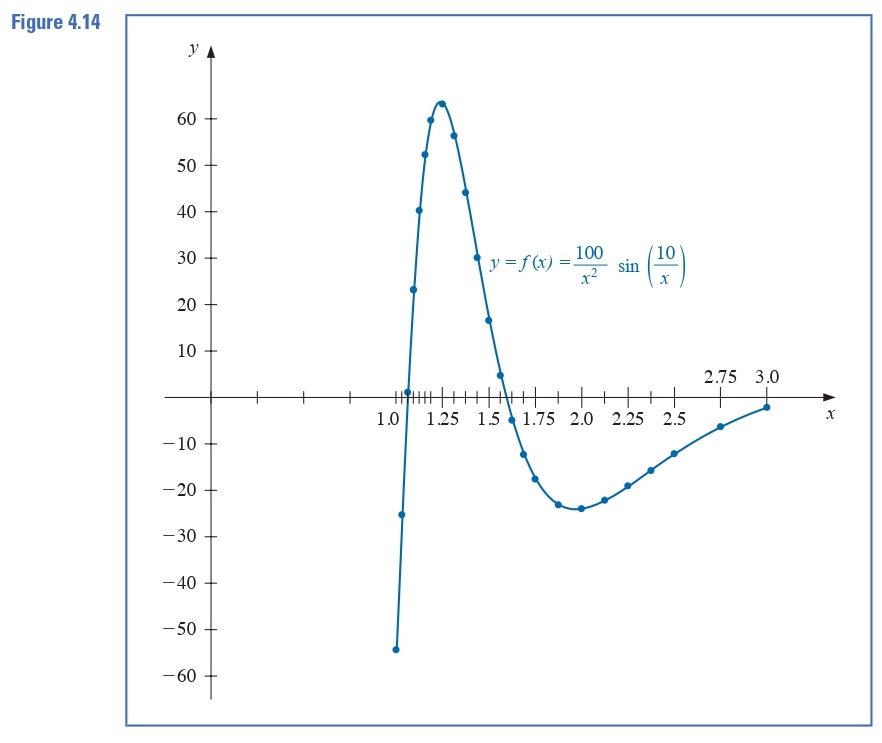

Sumber gambar: Burden, Richard L., Faires, J. Douglas. *Numerical Analysis*. Edisi ke-9. Bab 4, "Numerical Differentiation and Integration". Subbab 4.6, "Adaptive Quadrature Methods". Hlm. 226

(Pada program yang dimodifikasi tersebut, tidak ada modifikasi pada metode kuadratur adaptif itu sendiri; modifikasi yang dilakukan hanyalah agar program juga mengeluarkan *output* berupa titik-titik yang digunakan sebagai batasan subinterval.)

**BONUS 2: kode non-rekursif dari buku**

Berikut implementasi non-rekursif untuk kuadratur adaptif berdasarkan *pseudocode* di buku (Algorithm 4.3). Perlu dicatat bahwa, bahkan menurut buku (halaman 224, kalimat terakhir), "The method is easier to implement using a recursive programming language." (karena pseudocode yang diberikan mengasumsikan bahwa bahasa pemrograman yang digunakan tidak bisa menjalankan fungsi rekursif.)

Di sini, kuadratur adaptif yang harusnya dilakukan secara rekursif malah dipaksakan agar dilakukan secara "iteratif". Variabel i menandakan sisa interval yang perlu ditelusuri. Bisa dibayangkan, [FA, FB] memiliki titik tengah FC, sehingga dipartisi menjadi [FA, FC] dan [FC, FB]. Kemudian, titik tengah dari [FA, FC] adalah FD, dan titik tengah dari [FC, FB] adalah FE. Sehingga, kedudukan tiap titik dari kiri ke kanan adalah (FA, FD, FC, FE, FB). (Sebenarnya, FA, FB, FC, FD, dan FE adalah nilai fungsi, bukan titik x nya.)

Entah bagaimana caranya, pseudocode tersebut melakukan penyimpanan data secara strategis agar tidak lupa akan semua subinterval yang perlu dihitung integralnya secara numerik (sayangnya menggunakan terlalu banyak "array" yang di sini diimplementasikan sebagai dictionary, dan menggunakan terlalu banyak variabel seperti variabel v1, v2, ..., v8 yang kegunaannya tidak jelas dari penamaan variabelnya). Setelah melakukan partisi dan menyimpan semua subinterval dari kanan ke kiri, perhitungan integrasi numerik dilakukan dari subinterval paling kiri sampai interval paling kanan, dan tiap hasil perhitungan integral langsung ditambahkan ke APP yaitu variabel yang menyimpan hasil aproksimasi untuk keseluruhan integral.

Menariknya, permasalahan mengubah kode rekursif (seperti yang kita buat sebelumnya) menjadi kode "iteratif" (seperti yang ada di buku) tidak jarang ditemui, dan solusi yang paling sering digunakan adalah "*implement your own stack*". Tumpukan atau *stack* adalah salah satu struktur data yang dipelajari di mata kuliah Struktur Data (sering disebut "DSA" atau *data structures and algorithms* di kurikulum internasional) yang kebetulan merupakan mata kuliah wajib untuk program studi S1 Matematika.

In [ ]:
# Algoritma 4.3 di buku halaman 224-225
def AdaptifBurden(a_konstan, b_konstan, TOL_konstan, N):
    # === Step 1 ===
    APP = 0
    i = 1

    TOL, a, b, h, FA, FC, FB, S, L = {}, {}, {}, {}, {}, {}, {}, {}, {}

    TOL[i] = 10 * TOL_konstan
    a[i] = a_konstan
    h[i] = (b_konstan - a_konstan)/2
    FA[i] = f(a_konstan)
    FC[i] = f(a_konstan + h[i])
    FB[i] = f(b_konstan)

    S[i] = h[i] * ( FA[i] + 4 * FC[i] + FB[i] )/3
    #   (Approximation from Simpson's
    #   method for entire interval.)

    L[i] = 1

    # === Step 2 ===
    # While i > 0 do Steps 3-5.
    while i > 0:
        # === Step 3 ===
        FD = f( a[i] +     h[i]/2 )
        FE = f( a[i] + 3 * h[i]/2 )

        S1 = h[i] * ( FA[i] + 4 * FD + FC[i] )/6
        #   (Approximations from Simpson's
        #   method for halves of subintervals.)

        S2 = h[i] * ( FC[i] + 4 * FE + FB[i] )/6

        #   (Save data at this level.)
        v1 = a[i]
        v2 = FA[i]
        v3 = FC[i]
        v4 = FB[i]
        v5 = h[i]
        v6 = TOL[i]
        v7 = S[i]
        v8 = L[i]

        # === Step 4 ===

        i = i - 1
        #   (Delete the level.)

        # === Step 5 ===
        if abs(S1 + S2 - v7) < v6:
            APP = APP + (S1 + S2)
        elif (v8 >= N):
            return "LEVEL EXCEEDED"
            # STOP.
            #   (Procedure fails.)
        else:
            #   (Add one level.)
            
            #   (Data for right half subinterval.)
            i = i + 1
            a[i] = v1 + v5
            FA[i] = v3
            FC[i] = FE
            FB[i] = v4
            h[i] = (v5)/2
            TOL[i] = (v6)/2
            S[i] = S2
            L[i] = v8 + 1

            #   (Data for left half subinterval.)
            i = i + 1
            a[i] = v1
            FA[i] = v2
            FC[i] = FD
            FB[i] = v3
            h[i] = h[i-1]
            TOL[i] = TOL[i-1]
            S[i] = S1
            L[i] = L[i-1]
    
    # === Step 6 ===
    return APP
    # STOP.
    #   (APP approximates I to within TOL.)

In [ ]:
# Contoh fungsi
from numpy import sin
def f(x):
    hasil = (100/(x**2)) * sin(10/x)
    return hasil

print(AdaptifBurden(1, 3, 10**-4, N=7))
# sepertinya N terkecil agar tidak muncul "LEVEL EXCEEDED" adalah N=7

print(
"""
The graph of the function f(x) = (100/x^2) sin(10/x) for x in [1,3] is shown in
Figure 4.14. Using the Adaptive Quadrature Algorithm 4.3 with tolerance 10^-4
to approximate \int_{1}^{3} f(x) dx produces -1.426014, a result that is
accurate to within 1.1 x 10^-5.
"""
)

-1.4260148100494467

The graph of the function f(x) = (100/x^2) sin(10/x) for x in [1,3] is shown in
Figure 4.14. Using the Adaptive Quadrature Algorithm 4.3 with tolerance 10^-4
to approximate \int_{1}^{3} f(x) dx produces -1.426014, a result that is
accurate to within 1.1 x 10^-5.



# 8. Kuadratur Gauss (*Gaussian Quadrature*), pada interval $[-1,1]$

**Metode kuadratur Gauss (*Gaussian Quadrature*), atau lebih tepatnya disebut metode kuadratur Gauss-Legendre (*Gauss-Legendre Quadrature*), adalah suatu metode integrasi numerik yang melibatkan polinom Legendre monik ke-$n$.** Kita akan memerlukan akar-akar dari polinom Legendre ke-$n$, untuk nilai $n$ yang ditentukan. Mari kita bahas polinom Legendre terlebih dahulu. (Untuk ke depannya, kita akan menyebut metode ini "kuadratur Gauss" saja, meskipun nama yang lebih tepat adalah kuadratur Gauss-Legendre.)

Polinom Legendre ke-$n$, akan kita tulis $P_n (x)$, adalah polinom (dengan nilai $n$ tertentu yang berupa bilangan cacah, yaitu $n = 0, 1, 2, \dots$) yang memenuhi beberapa sifat istimewa. Beberapa di antara sifat-sifat istimewa tersebut adalah:
*   Polinom Legendre ke-$n$ memiliki pangkat tertinggi $x^n$.
*   Polinom Legendre ke-$n$ memiliki **tepat $n$ akar yang semuanya berupa bilangan riil, dan semua akar-akar tersebut terletak di antara $-1 \le x \le 1$.**
*   Akar-akar polinom Legendre bersifat "simeteris", yaitu, apabila misal $x$ adalah salah satu akar untuk suatu polinom Legendre, maka $-x$ juga merupakan akar dari polinom Legendre tersebut.

Maksud istilah "akar" adalah nilai $x$ yang membuat $P_n (x) = 0$.

Untuk kuadratur Gauss, kita akan memanfaatkan polinom Legendre yang **monik**. Polinom yang monik (*monic polynomial*) adalah polinom yang pangkat tertingginya dikali 1. Misalnya, $x^2 - 4$ bersifat monik, tetapi kalau misalnya kita kalikan 3, kita dapatkan $3x^2 - 12$, yang tidak lagi monik. Sehingga, kita bisa membuat $3x^2 - 12$ menjadi monik dengan dibagi 3.

Artinya, kalau kita mendapatkan polinom yang tidak monik, kita bisa menjadikannya monik, membaginya dengan apapun pengkali pangkat tertinggi.

Menurut buku, polinom Legendre monik untuk beberapa nilai $n$ pertama adalah:

$$P_0 (x) = 1, \hspace{0.5cm} P_1 (x) = x, \hspace{0.5cm} P_2 (x) = x^2 - \frac{1}{3}$$

$$P_3 (x) = x^3 - \frac{3}{5} x, \hspace{0.5cm} P_4 (x) = x^4 - \frac{6}{7} x^2 + \frac{3}{35}$$

Di metode numerik, tidak dibahas cara mendapatkan polinom Legendre, atau cara menentukan semua $n$ akar dari polinom Legendre ke-$n$ untuk sembarang $n$ bilangan cacah. Biasanya, semua data yang diperlukan sudah tersedia di tabel. Untungnya, sympy bisa menghasilkan polinom Legendre ke-$n$ untuk apapun bilangan cacah $n$ yang kita inginkan, bahkan sympy juga bisa menentukan semua $n$ akar tersebut.

Mari kita import dulu:

In [ ]:
import sympy
x = sympy.symbols("x")

Contoh untuk n=0 dan n=1, menurut sympy:

In [ ]:
Legendre0 = sympy.legendre(0, x)
sympy.pprint(Legendre0)

1


In [ ]:
sympy.pprint(sympy.legendre(1, x))

x


Sejauh ini, masih sesuai dengan buku, sudah monik. Bagaimana dengan n=4?

In [ ]:
Legendre4 = sympy.legendre(4, x)
sympy.pprint(Legendre4)

    4       2    
35⋅x    15⋅x    3
───── - ───── + ─
  8       4     8


Ternyata, menurut sympy, polinom Legendre tidak harus monik. Untungnya, kita bisa meminta sympy untuk menjadikannya monik.

In [ ]:
MonicLegendre4 = sympy.monic(Legendre4)
sympy.pprint(MonicLegendre4)

        2     
 4   6⋅x    3 
x  - ──── + ──
      7     35


Kemudian, kita bisa menggunakan `sympy.nroots` untuk mendapatkan list semua akar dari polinom Legendre. 

In [ ]:
AkarLegendre4 = sympy.nroots(MonicLegendre4)
print(AkarLegendre4)

[-0.861136311594053, -0.339981043584856, 0.339981043584856, 0.861136311594053]


Mari kita buat fungsi untuk mendapatkan list akar-akar dari polinom Legendre monik ke-$n$.

In [ ]:
import sympy
x = sympy.symbols("x")

def AkarLegendre(n):
    # P_n (x) untuk n yang diberikan
    PolinomLegendre = sympy.legendre(n, x)

    if n > 1: # tadi sudah kita coba, untuk n=0 dan n=1 ternyata sudah monik
        # selain n=0 dan n=1, kita perlu pastikan dia monik
        PolinomLegendre = sympy.monic(PolinomLegendre)
    
    # memperoleh list semua akar
    if n == 0: # ingat, banyaknya akar adalah n. Kalau n=0 berarti tiada akar
        list_akar = []
    else:
        list_akar_sympy = sympy.nroots(PolinomLegendre)
        # bisa saja list tersebut berisi bilangan yang masih berbentuk sympy,
        # mari kita jadikan angka biasa atau angka Python dulu
        list_akar = []
        for angka_sympy in list_akar_sympy:
            angka_biasa = float(angka_sympy)
            list_akar.append(angka_biasa)
    
    return list_akar

Bisa dicoba:

In [ ]:
AkarLegendre(4)

[-0.8611363115940526,
 -0.33998104358485626,
 0.33998104358485626,
 0.8611363115940526]

Mari kita lanjut pembahasan kita. **Kuadratur Gauss adalah metode aproksimasi integral pada interval $[-1,1]$**, dengan bentuk aproksimasi sebagai berikut:

$$\int_{-1}^{1} f\left(x\right) dx \approx \sum_{i=1}^{n} c_i f\left(x_i\right)$$

di mana $x_1, x_2, \dots, x_n$ adalah akar-akar dari polinom Legendre monik ke-$n$, dan koefisien $c_1, c_2, \dots, c_n$ dihitung sebagai berikut, untuk $i = 1, 2, \dots, n $:

$$c_i = \int_{-1}^{1} \prod_{j=1 \\ j \ne i}^{n} \frac{x - x_j}{x_i - x_j} dx$$

Biasanya, untuk nilai $n$ yang ditentukan, nilai $x_i$ dan $c_i$ untuk $i = 1, 2, \dots, n$ sudah dihitung sebelumnya dan tercatat dalam bentuk tabel, sehingga kita tidak perlu lagi pusing dengan polinom Legendre ataupun cara mendapatkan koefisien-koefisien tersebut.

Mumpung kita sudah bisa memperoleh list semua akar secara pemrograman, mari kita coba memperoleh list semua koefisien $c_i$ secara pemrograman juga (menggunakan list akar $x_i$ tersebut). Perhatikan bahwa perkalian pecahan di atas terlihat seperti pada interpolasi Lagrange. Sehingga, kode kita akan mirip dengan kode interpolasi Lagrange. Ternyata, seperti pada interpolasi Lagrange, hasil perkalian tersebut menghasilkan polinom, sehingga integralnya pasti bisa dihitung secara analitik.

Selain turunan analitik, sympy juga bisa menghitung integral secara analitik. Misalnya, untuk integral tak tentu, $\int 3x^2 dx$, yaitu integral $3x^2$ terhadap $x$:

In [ ]:
hasil_tak_tentu = sympy.integrate(3 * x**2, x)
sympy.pprint(hasil_tak_tentu)

 3
x 


sympy juga bisa menghitung nilai integral tentu, misalnya $\int_{-2}^{5} 3x^2 dx$:

In [ ]:
hasil_tentu = sympy.integrate(3 * x**2, (x, -2, 5) )
print(hasil_tentu)

133


Namun, kita hanya akan memanfaatkan fitur ini untuk menentukan koefisien $c_i$ saja.

In [ ]:
def KoefisienLegendre(list_akar):
    list_c = []
    n = len(list_akar) # n adalah banyaknya akar

    for i in range(n): # banyaknya koefisien adalah n juga
        # kita tentukan hasil kali pecahannya dulu (dengan x dari sympy)
        L = 1 # kode sangat mirip dengan interpolasi Lagrange, fungsi L
        for j in range(n): # perkalian dilakukan dari j=1 sampai j=n
            if j != i: # perhatikan syarat j != i pada perkalian
                L *= ( x - list_akar[j] ) / ( list_akar[i] - list_akar[j] )
        # sampai sini, hasil kali pecahan sudah selesai, tinggal diintegralkan
        # (perhatikan bahwa L yaitu hasil kali pecahan ini berupa polinom)

        # kita perlu integral L, terhadap x, dari x = -1 sampai x = 1
        hasil_integral = sympy.integrate(L, (x, -1, 1))
        # sebenarnya bisa dilakukan pakai metode yang telah dibahas sebelumnya,
        # itu kalau mau full numerik :) tapi ini analitik aja, masih polinom

        # ubah dari bentuk sympy jadi bentuk angka
        hasil_integral = float(hasil_integral)

        # hasil integral tersebut adalah koefisien kita. Tambahkan ke list
        list_c.append(hasil_integral)
    
    # sampai sini, list koefisien sudah jadi
    return list_c

Kemudian, barulah kita bisa menyusun program untuk kuadratur Gauss pada interval $[-1,1]$:

In [ ]:
def KuadraturGauss_11(f, n):
    hasil = 0

    # list x_i dan c_i
    list_x = AkarLegendre(n)
    list_c = KoefisienLegendre(list_x)

    # sumasi c_i * f(x_i)
    for i in range(n):
        hasil += list_c[i] * f( list_x[i] )
    
    return hasil

In [ ]:
from numpy import sin, cos, tan, log, exp, pi

print("Kuadratur Gauss pada interval [-1,1]")
print("Masukkan rumus fungsi yang akan diintegralkan:")
formula = input("f(x) = ")
def func(x):
    return eval(formula)

n = eval(input("Masukkan bilangan bulat positif (n): "))
print()

hasil_integral = KuadraturGauss_11(func, n)

print(f"Hasil kuadratur Gauss pada interval [-1,1] dengan n = {n} adalah:")
print(hasil_integral)

Kuadratur Gauss pada interval [-1,1]
Masukkan rumus fungsi yang akan diintegralkan:
f(x) = exp(x) * cos(x)
Masukkan bilangan bulat positif (n): 3

Hasil kuadratur Gauss pada interval [-1,1] dengan n = 3 adalah:
1.9333904692642974


**BONUS: "cara cepat"**

Sebenarnya, numpy sudah memiliki fitur untuk langsung memperoleh semua akar $x_n$ untuk polinom Legendre monik ke-n serta semua koefisien $c_n$ untuk kuadratur Gauss-Legendre, untuk apapun bilangan bulat positif $n$ yang kita berikan. Misalnya, untuk $n=4$:

In [ ]:
import numpy as np
n = 4
array_akar, array_koefisien = np.polynomial.legendre.leggauss(n)
print(array_akar)
print(array_koefisien)

[-0.86113631 -0.33998104  0.33998104  0.86113631]
[0.34785485 0.65214515 0.65214515 0.34785485]


Bandingkan dengan tabel:

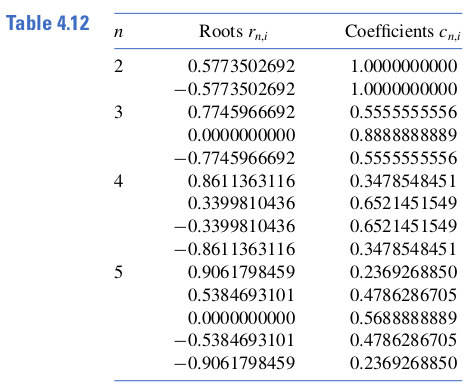

Sumber tabel: Burden, Richard L., Faires, J. Douglas. *Numerical Analysis*. Edisi ke-9. Bab 4, "Numerical Differentiation and Integration". Subbab 4.7, "Gaussian Quadrature". Hlm. 232

Sehingga, keseluruhan kode Python untuk kuadratur Gauss-Legendre pada interval $[-1,1]$ bisa kita tuliskan sesingkat ini (tanpa harus membuat fungsi untuk menentukan akar-akar polinom Legendre maupun koefisien Gauss-Legendre yang diperlukan):

In [ ]:
import numpy as np

def KuadraturGauss_11_bonus(f, n):
    hasil = 0

    # array x_i dan c_i
    array_x, array_c = np.polynomial.legendre.leggauss(n)

    # sumasi c_i * f(x_i)
    for i in range(n):
        hasil += array_c[i] * f( array_x[i] )
    
    return hasil

Cara ini tidak langsung kami ajarkan ketika praktikum, agar kalian tidak lupa belajar/mempraktikkan cara memperoleh koefisien $c_n$ melalui integral. Lagipula, menurut dokumentasi numpy (https://numpy.org/doc/stable/reference/generated/numpy.polynomial.legendre.leggauss.html),

> The results have only been tested up to degree 100, higher degrees may be problematic.

yaitu, untuk nilai $n > 100$, numpy belum tentu memberikan hasil yang benar. Kami berharap bahwa, cara yang lebih manual yang sudah dibuat sebelumnya, memberikan hasil yang dijamin akurat untuk apapun nilai n. (Sayangnya, cara manual jauh lebih lambat daripada cara numpy apabila digunakan nilai n yang sangat besar. Jadi, masing-masing cara ada kelebihan dan kekurangan yang bisa menjadi pertimbangan untuk Anda memilih ingin menggunakan yang mana.)

Apabila Anda penasaran lebih lanjut tentang kuadratur Gauss dan polinom Legendre, seperti cara membentuk sembarang polinom Legendre (dengan rumus rekursif), bahkan hingga cara memperoleh semua akar polinom Legendre menggunakan metode *root-finding* dengan beberapa tebakan awal yang sesuai, silakan belajar dari link berikut ini:

https://rosettacode.org/wiki/Numerical_integration/Gauss-Legendre_Quadrature

*Fun fact*: himpunan semua polinom Legendre membentuk (basis untuk) suatu ruang fungsi, yaitu ruang vektor dengan vektor berupa fungsi, pada interval $[-1,1]$. Anggota himpunannya tak terhingga banyaknya, karena ada n=0,1,2,3, dan seterusnya. Definisi hasil kali dalam yang digunakan adalah integral perkalian dua fungsi pada interval $[-1,1]$. Semua polinom Legendre saling ortogonal, yaitu hasil kali dalam untuk sembarang dua polinom Legendre yang berbeda adalah nol. Sehingga, himpunan polinom Legendre adalah himpunan ortogonal. Salah satu cara membentuk polinom Legendre adalah dengan menerapkan proses Gram-Schmidt pada vektor 1, $x$, $x^2$, $x^3$, dan seterusnya. Konsep ruang fungsi, fungsi ortogonal dan sebagainya, termasuk serba-serbi "polinom ortogonal" seperti polinom Legendre, dipelajari lebih lanjut di "analisis fungsional" (*functional analysis*), dan salah satu prasyaratnya pastinya adalah aljabar linier.

# 9. Kuadratur Gauss untuk sembarang interval (*Gaussian Quadrature on Arbitrary Intervals*)

Sembarang integral $\int_{a}^{b} f\left(x\right) dx$ bisa diubah menjadi integral pada $[-1,1]$, dengan nilai integral yang tetap sama:

$$\int_{a}^{b} f\left(x\right) dx = \int_{-1}^{1} f\left( \frac{(b-a)t + (b+a)}{2} \right) \frac{(b-a)}{2} dt$$

Sehingga, dengan melakukan perubahan variabel tersebut, kuadratur Gauss sebenarnya bisa diterapkan pada sembarang interval $[a,b]$, yaitu diubah terlebih dahulu menjadi integral pada $[-1,1]$.

Untuk pemrograman, jika perlu dihitung $\int_{a}^{b} f\left(x\right) dx$, mari kita definisikan fungsi baru $g(t)$:

$$g(t) = f\left( \frac{(b-a)t + (b+a)}{2} \right) \frac{(b-a)}{2}$$

agar

$$\int_{a}^{b} f\left(x\right) dx = \int_{-1}^{1} f\left( \frac{(b-a)t + (b+a)}{2} \right) \frac{(b-a)}{2} dt = \int_{-1}^{1} g\left(t\right) dt$$

sehingga kita tinggal menghitung $\int_{-1}^{1} g\left(t\right) dt$ menggunakan kuadratur Gauss.

In [ ]:
def KuadraturGaussUmum(f, a, b, n):
    # mendefinisikan fungsi g(t)
    def g(t):
        hasil_g = f( ( (b-a)*t + (b+a) )/2 ) * (b-a)/2
        return hasil_g
    
    # tinggal melakukan kuadratur Gauss [-1,1] untuk fungsi g, itulah hasilnya
    hasil_integral = KuadraturGauss_11(g, n)
    return hasil_integral

In [ ]:
from numpy import sin, cos, tan, log, exp, pi

print("Kuadratur Gauss untuk sembarang interval")
print("Masukkan rumus fungsi yang akan diintegralkan:")
formula = input("f(x) = ")
def func(x):
    return eval(formula)

lower_bound = eval(input("Masukkan batas bawah (a): "))
upper_bound = eval(input("Masukkan batas atas (b): "))
n = eval(input("Masukkan bilangan bulat positif (n): "))
print()

hasil_integral = KuadraturGaussUmum(func, lower_bound, upper_bound, n)

print(f"Hasil kuadratur Gauss pada interval [{lower_bound},{upper_bound}] dengan n = {n} adalah:")
print(hasil_integral)

Kuadratur Gauss untuk sembarang interval
Masukkan rumus fungsi yang akan diintegralkan:
f(x) = x**6 - x**2 * sin(2*x)
Masukkan batas bawah (a): 1
Masukkan batas atas (b): 3
Masukkan bilangan bulat positif (n): 2

Hasil kuadratur Gauss pada interval [1,3] dengan n = 2 adalah:
306.8199344959197
